# Reccomendation plan Prediction model

Based on users preferences make a prediction model to predict whether user would like one of 2 mobile plans.

## Data exploration

Start by examining summary statistics of our dataset, such as mean, standard deviation, and quartiles, to get a sense of the range and distribution of each feature.

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('users_behavior.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


## Correlation analysis

Calculating the correlation matrix between your features to understand the relationships between them. Plotting a correlation heatmap can visually highlight any significant correlations between the features. This analysis will help you identify if there are strong linear relationships between features.

In [5]:
df.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


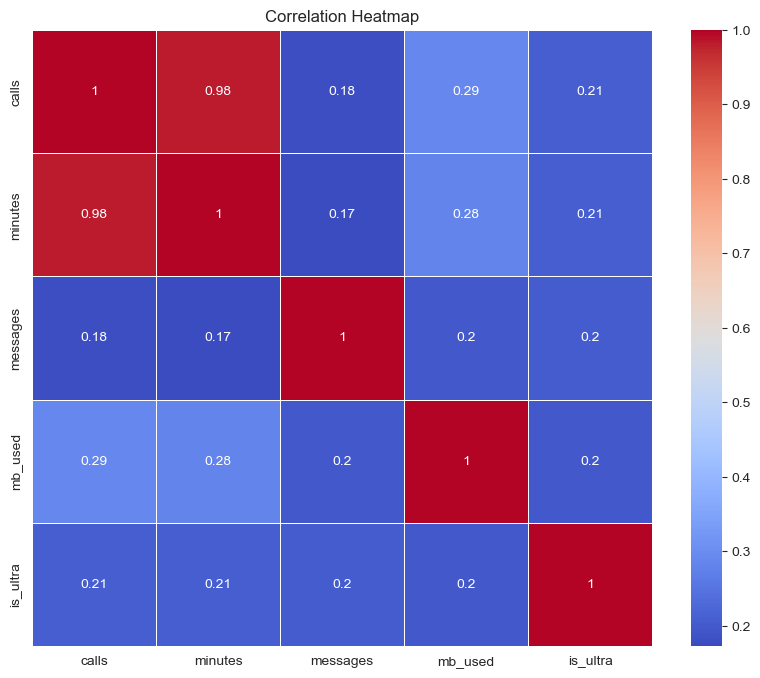

In [6]:
correlation_matrix = df.corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, ax=ax)
plt.title("Correlation Heatmap")

plt.show()

Correlation between features we can determine as Cheddok scale:
0,1 - 0,3 - low correlations,
0,3 - 0,5 - medium correlation,
0,5 - 0,7 - noticiable correlation,
0,7 - 0,9 - high corelation,
0,9 - 0,99 - very high correlation.

By the correlation heatmap we ca nse that we have very high correlation between calls and minutes. The rest are correlating low between each other.

## Feature distributions:
Plot histograms or kernel density estimations (KDE) for each feature, separated by the target variable (tariff plan). This will give an idea of how the distributions of each feature differ between the two tariff plans.

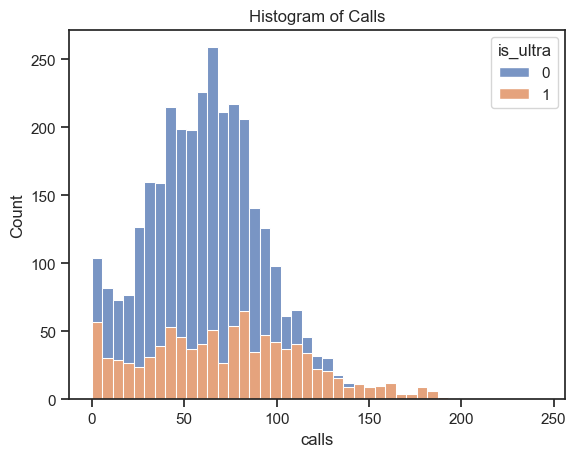

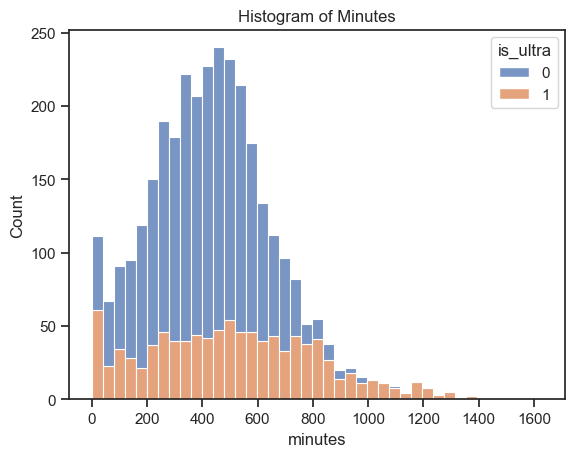

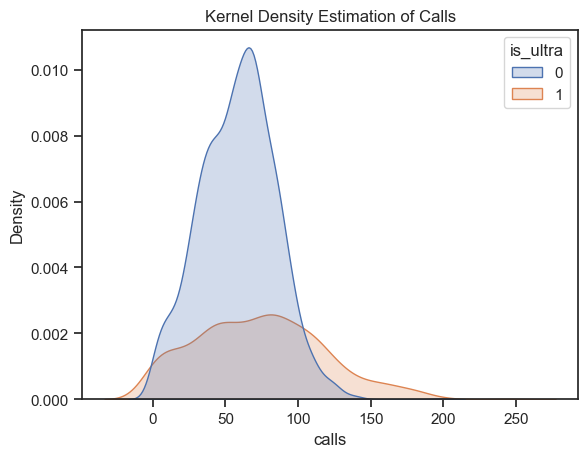

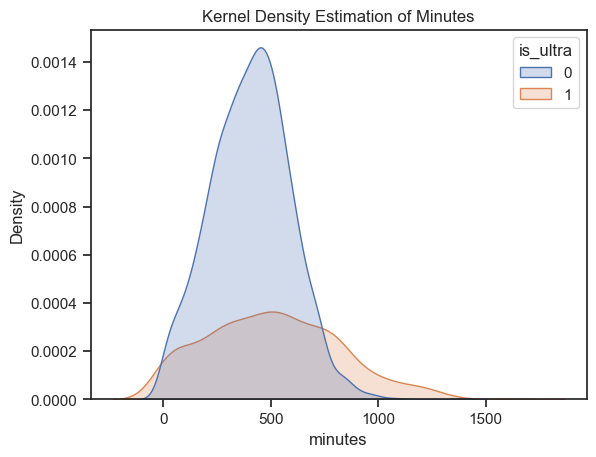

In [7]:
sns.set(style="ticks")
sns.histplot(data=df, x="calls", hue="is_ultra", multiple="stack", kde=False)
plt.title("Histogram of Calls")
plt.show()

sns.set(style="ticks")
sns.histplot(data=df, x="minutes", hue="is_ultra", multiple="stack", kde=False)
plt.title("Histogram of Minutes")
plt.show()

sns.set(style="ticks")
sns.kdeplot(data=df, x="calls", hue="is_ultra", fill=True)
plt.title("Kernel Density Estimation of Calls")
plt.show()

sns.set(style="ticks")
sns.kdeplot(data=df, x="minutes", hue="is_ultra", fill=True)
plt.title("Kernel Density Estimation of Minutes")
plt.show()

## Scatter plots:
Creating scatter plots to visualize the relationships between pairs of numerical features (e.g., calls vs. minutes, messages vs. mb_used) and color the points based on the tariff plan. This can help understand if there are any discernible patterns or separability between the classes.

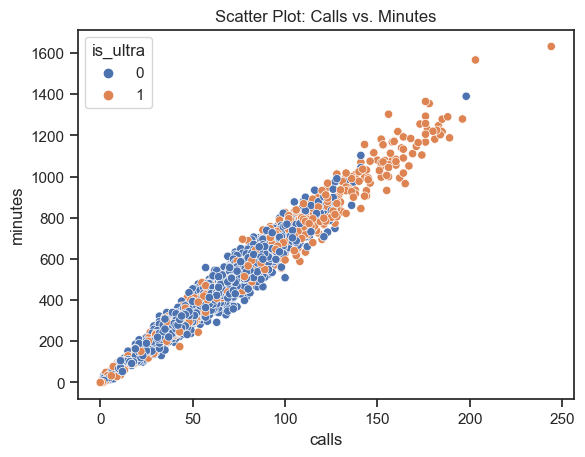

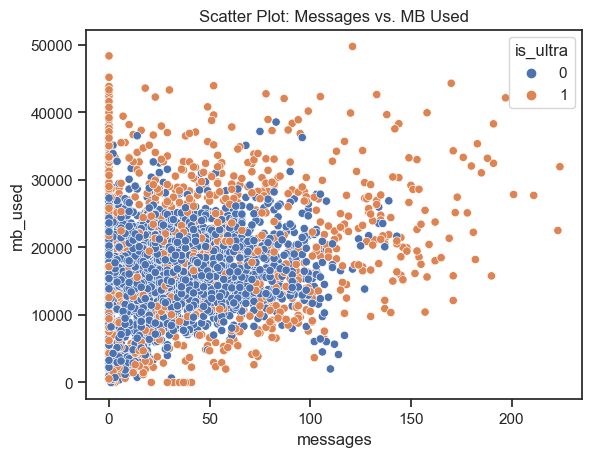

In [8]:
sns.scatterplot(data=df, x="calls", y="minutes", hue="is_ultra")
plt.title("Scatter Plot: Calls vs. Minutes")
plt.show()

sns.scatterplot(data=df, x="messages", y="mb_used", hue="is_ultra")
plt.title("Scatter Plot: Messages vs. MB Used")
plt.show()

## Box plots: 
Generating box plots for each numerical feature, comparing the distribution between the two tariff plans. This will help identify if there are significant differences in the central tendency and spread of each feature between the classes.

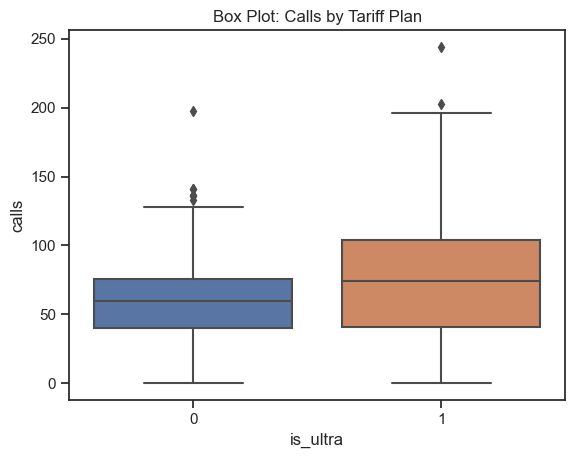

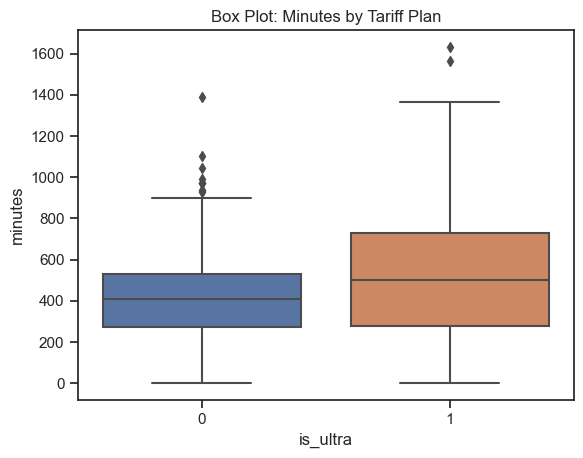

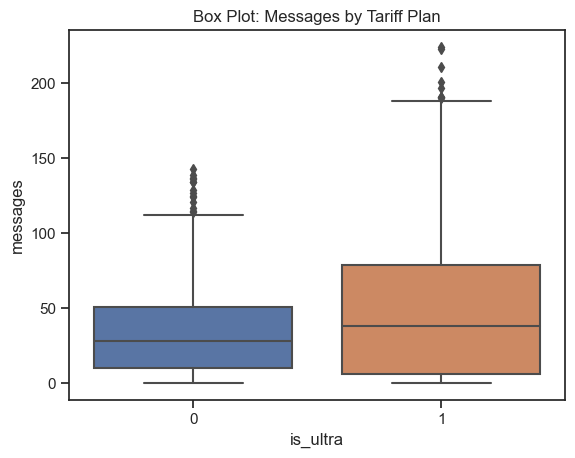

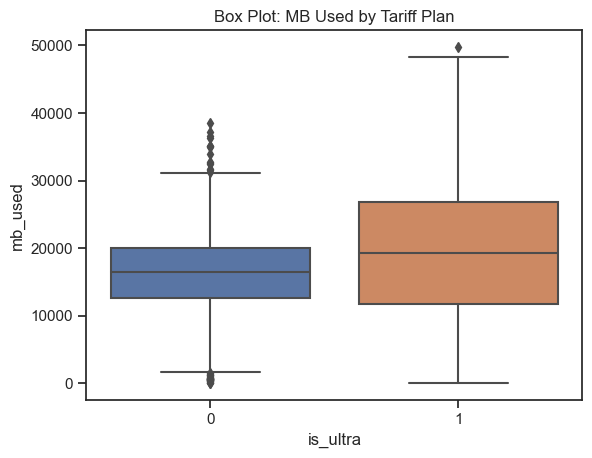

In [9]:
sns.boxplot(data=df, x="is_ultra", y="calls")
plt.title("Box Plot: Calls by Tariff Plan")
plt.show()

sns.boxplot(data=df, x="is_ultra", y="minutes")
plt.title("Box Plot: Minutes by Tariff Plan")
plt.show()

sns.boxplot(data=df, x="is_ultra", y="messages")
plt.title("Box Plot: Messages by Tariff Plan")
plt.show()

sns.boxplot(data=df, x="is_ultra", y="mb_used")
plt.title("Box Plot: MB Used by Tariff Plan")
plt.show()

By analyzing and visualizing our data using the steps above, we can gain insights into the characteristics and relationships within dataset.
- Scatter plots not showing a clear linear separation between the classes. Logistic regression won't be effective.
- Scatter plots exhibit complex relationships. Random Trees and Decision Tree will be effective.

## Splitting dataset into training, testing and valid sets

We must split our data frame into 3 data frames with these proportions:
train = 60%
test = 20%
valid = 20%

In [10]:
features = df.drop('is_ultra', axis=1)
target = df['is_ultra']

In [11]:
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                              target,
                                                                              test_size = 0.4,
                                                                              train_size = 0.6,
                                                                              random_state=42)


In [12]:
features_test, features_valid, target_test, target_valid = train_test_split(features_test,
                                                                           target_test,
                                                                           test_size=0.5,
                                                                          random_state=42)

In [13]:
print('Feature Train and Target Train shapes: ',features_train.shape, target_train.shape)
print('Feature Valid and Target Valid shapes: ',features_valid.shape, target_valid.shape)
print('Feature Test and Target Test shapes: ',features_test.shape, target_test.shape)

Feature Train and Target Train shapes:  (1928, 4) (1928,)
Feature Valid and Target Valid shapes:  (643, 4) (643,)
Feature Test and Target Test shapes:  (643, 4) (643,)


## Making models

Scatter plots not showing a clear linear separation between the classes. Logistic regression won't be effective.
Scatter plots exhibit complex relationships. Random Trees and Decision Tree will be effective.

In [14]:
best_model_random_forest = None
best_result_random_forest = 0
best_est_random_forest = 0
best_depth_random_forest = 0
for est in range(10, 151, 10):
    for depth in range (1, 11):
        model_random_forest = RandomForestClassifier(random_state=42, max_depth=depth, n_estimators=est)
        model_random_forest.fit(features_train, target_train)
        predictions_valid_random_forest = model_random_forest.predict(features_valid)
        result_random_forest = accuracy_score(target_valid, predictions_valid_random_forest)
        if result_random_forest > best_result_random_forest:
            best_model_random_forest = model_random_forest
            best_result_random_forest = result_random_forest
            best_est_random_forest = est
            best_depth_random_forest = depth
print("Trees count:", best_est_random_forest, ", Max depth:", best_depth_random_forest)
print('Accuracy of Random Forest model on validation data:', best_result_random_forest)

Trees count: 10 , Max depth: 6
Accuracy of Random Forest model on validation data: 0.8304821150855366


In [15]:
best_model_decision_tree = None
best_result_decision_tree = 0
best_depth_decision_tree = 0
for depth in range(1, 10):
    model_decision_tree = DecisionTreeClassifier(random_state=42, max_depth=depth, max_features='auto')
    model_decision_tree.fit(features_train, target_train)
    predictions_valid_decision_tree = model_decision_tree.predict(features_valid)
    result_decision_tree = accuracy_score(target_valid, predictions_valid_decision_tree)
    if result_decision_tree > best_result_decision_tree:
        best_model_decision_tree = model_decision_tree
        best_result_decision_tree = result_decision_tree
        best_depth_decision_tree = depth

print("Best model on validation data:", best_result_decision_tree, ", Trees depth:", best_depth_decision_tree)
print('Accuracy of Decision Tree model on validation data:',best_result_decision_tree)

Best model on validation data: 0.8133748055987559 , Trees depth: 4
Accuracy of Decision Tree model on validation data: 0.8133748055987559


## Test models

In [16]:
predictions_test_random_forest = best_model_random_forest.predict(features_test)
accuracy_test_random_forest = accuracy_score(target_test, predictions_test_random_forest)
print('Accuracy of Random Forest model on test data:', accuracy_test_random_forest)

Accuracy of Random Forest model on test data: 0.8040435458786936


In [17]:
predictions_test_decision_tree = best_model_decision_tree.predict(features_test)
accuracy_test_decision_tree = accuracy_score(target_test, predictions_test_decision_tree)
print('Accuracy of Decision Tree on test data:',accuracy_test_decision_tree)

Accuracy of Decision Tree on test data: 0.7776049766718507


## Conclusion

We looked at data. Analysed it by plotting Boxplots, Scatters plots and KDEs to choose right model for us to try.
We tried Random Forest model and Decision Tree model. With both of them we made it to 0.75 accuracy.
Random Forest model is a bit more accurate then Decision Tree
For Random Forest accuracy on validation data is 83,1% but on test data is 80,4%
For Decision Tree accuracy on validation data is 81% but on test data is 77,7%